In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# reload original files (safe)
apps = pd.read_csv("apps.csv")
reviews = pd.read_csv("user_reviews.csv")

# quick confirmation
print("apps shape:", apps.shape)
print("reviews shape:", reviews.shape)


apps shape: (9659, 14)
reviews shape: (64295, 5)


In [ ]:
#  Preview data and column info
print("=== apps.head() ===")
display(apps.head(6))

print("\n=== apps.info() ===")
apps.info()

print("\n=== reviews.head() ===")
display(reviews.head(6))

print("\n=== reviews.info() ===")
reviews.info()


=== apps.head() ===


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up



=== apps.info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB

=== reviews.head() ===


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000



=== reviews.info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
# Drop Unnamed index column if it exists
if 'Unnamed: 0' in apps.columns:
    apps.drop(columns=['Unnamed: 0'], inplace=True)
    print("Dropped Unnamed: 0")
else:
    print("No Unnamed: 0 column found")
apps.info()
apps.head(3)


Dropped Unnamed: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 981.1+ KB


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [ ]:
# Remove rows with missing Rating
before = len(apps)
apps = apps[apps['Rating'].notna()].copy()
after = len(apps)
print(f"Rows before: {before}, after removing missing Rating: {after}")
print("Now Rating nulls:", apps['Rating'].isna().sum())
apps.info()


Rows before: 9659, after removing missing Rating: 8196
Now Rating nulls: 0
<class 'pandas.core.frame.DataFrame'>
Index: 8196 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8196 non-null   object 
 1   Category        8196 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         8196 non-null   int64  
 4   Size            7027 non-null   float64
 5   Installs        8196 non-null   object 
 6   Type            8196 non-null   object 
 7   Price           8196 non-null   object 
 8   Content Rating  8196 non-null   object 
 9   Genres          8196 non-null   object 
 10  Last Updated    8196 non-null   object 
 11  Current Ver     8192 non-null   object 
 12  Android Ver     8194 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 896.4+ KB


In [ ]:
# Create Size_MB safely (same as Size)
apps['Size_MB'] = apps['Size']  # since Size is already numeric

print("Size_MB summary:")
print(apps['Size_MB'].describe())

apps[['App','Size','Size_MB']].head(5)


Size_MB summary:
count    7027.000000
mean       21.754490
std        22.726446
min         0.000000
25%         4.900000
50%        13.000000
75%        31.000000
max       100.000000
Name: Size_MB, dtype: float64


,App,Size,Size_MB
0,Photo Editor & Candy Camera & Grid & ScrapBook,19.0,19.0
1,Coloring book moana,14.0,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",8.7,8.7
3,Sketch - Draw & Paint,25.0,25.0
4,Pixel Draw - Number Art Coloring Book,2.8,2.8


In [ ]:
# Clean Installs (remove + and commas, convert to number)
apps['Installs_raw'] = apps['Installs']  # keep original

apps['Installs'] = apps['Installs'].str.replace('+', '', regex=False)
apps['Installs'] = apps['Installs'].str.replace(',', '', regex=False)
apps['Installs'] = pd.to_numeric(apps['Installs'], errors='coerce')

print("Installs sample:", apps['Installs'].head(10).to_list())
print("Null count:", apps['Installs'].isna().sum())
apps['Installs'].describe()


Installs sample: [10000, 500000, 5000000, 50000000, 100000, 50000, 50000, 1000000, 1000000, 10000]
Null count: 0


count    8.196000e+03
mean     9.165090e+06
std      5.825087e+07
min      1.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [ ]:
# Clean Price
apps['Price_raw'] = apps['Price']  # keep original

apps['Price'] = apps['Price'].str.replace('$', '', regex=False)
apps['Price'] = pd.to_numeric(apps['Price'], errors='coerce')

print("Unique Price values:", apps['Price'].unique()[:20])
print("Null count:", apps['Price'].isna().sum())
apps['Price'].describe()


Unique Price values: [ 0.    4.99  3.99  6.99  7.99  5.99  2.99  3.49  1.99  9.99  7.49  0.99
  9.    5.49 10.   24.99 11.99 79.99 16.99 14.99]
Null count: 0


count    8196.000000
mean        1.037884
std        16.857882
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [ ]:
# Metrics Analysis (mean, median, min, max)

metrics_results = {
    "Rating": {
        "mean": apps['Rating'].mean(),
        "median": apps['Rating'].median(),
        "min": apps['Rating'].min(),
        "max": apps['Rating'].max()
    },
    "Size_MB": {
        "mean": apps['Size_MB'].mean(),
        "median": apps['Size_MB'].median(),
        "min": apps['Size_MB'].min(),
        "max": apps['Size_MB'].max()
    },
    "Installs": {
        "mean": apps['Installs'].mean(),
        "median": apps['Installs'].median(),
        "min": apps['Installs'].min(),
        "max": apps['Installs'].max()
    },
    "Price": {
        "mean": apps['Price'].mean(),
        "median": apps['Price'].median(),
        "min": apps['Price'].min(),
        "max": apps['Price'].max()
    }
}

metrics_results


{'Rating': {'mean': np.float64(4.173243045387993),
  'median': np.float64(4.3),
  'min': np.float64(1.0),
  'max': np.float64(5.0)},
 'Size_MB': {'mean': np.float64(21.754489824960867),
  'median': np.float64(13.0),
  'min': np.float64(0.0),
  'max': np.float64(100.0)},
 'Installs': {'mean': np.float64(9165089.719131283),
  'median': np.float64(100000.0),
  'min': np.int64(1),
  'max': np.int64(1000000000)},
 'Price': {'mean': np.float64(1.0378843338213763),
  'median': np.float64(0.0),
  'min': np.float64(0.0),
  'max': np.float64(400.0)}}

Top 10 categories:
Category
FAMILY             1608
GAME                912
TOOLS               718
FINANCE             302
PRODUCTIVITY        301
LIFESTYLE           301
PERSONALIZATION     298
MEDICAL             290
BUSINESS            263
PHOTOGRAPHY         263
Name: count, dtype: int64


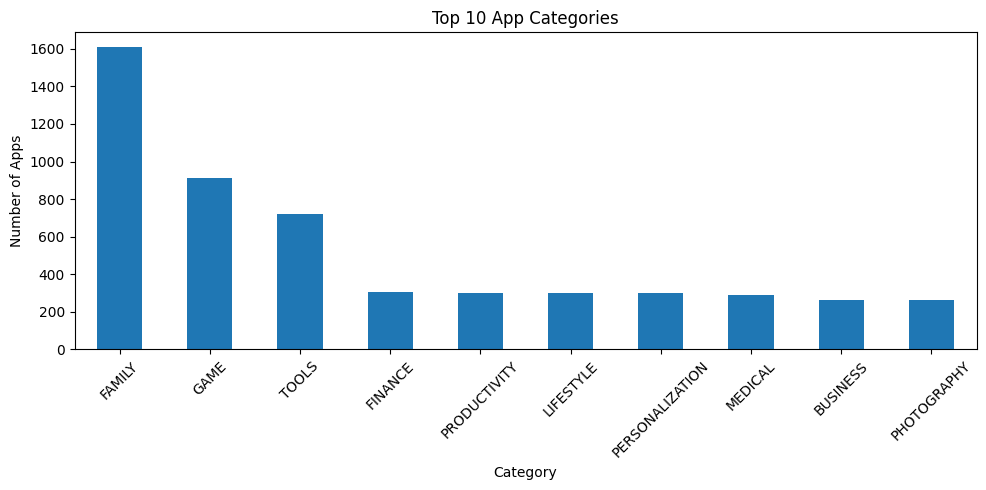

In [ ]:
# Category Exploration
# Count apps per category
category_counts = apps['Category'].value_counts()

print("Top 10 categories:")
print(category_counts.head(10))

# Bar chart of top 10 categories
plt.figure(figsize=(10,5))
category_counts.head(10).plot(kind='bar')
plt.title("Top 10 App Categories")
plt.xlabel("Category")
plt.ylabel("Number of Apps")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Category-wise Metrics

category_summary = apps.groupby('Category').agg({
    'Rating': 'mean',
    'Installs': 'mean',
    'Size_MB': 'mean'
}).sort_values(by='Installs', ascending=False)

category_summary.head(10)


,Rating,Installs,Size_MB
Category,,,
COMMUNICATION,4.121484,4.311813e+07,11.952128
SOCIAL,4.247291,2.703370e+07,17.314103
VIDEO_PLAYERS,4.044595,2.653241e+07,15.835714
ENTERTAINMENT,4.135294,2.072216e+07,23.043750
PRODUCTIVITY,4.183389,1.924608e+07,12.061883
PHOTOGRAPHY,4.157414,1.767735e+07,15.784314
TRAVEL_AND_LOCAL,4.069519,1.548053e+07,24.772340
GAME,4.247368,1.521794e+07,42.879327
NEWS_AND_MAGAZINES,4.121569,1.161329e+07,12.415584


In [ ]:
# Clean the reviews dataset

# Remove rows with no review text
reviews_clean = reviews.dropna(subset=['Translated_Review'])

print("Rows before:", len(reviews))
print("Rows after cleaning:", len(reviews_clean))

reviews_clean.head()


Rows before: 64295
Rows after cleaning: 37427


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


Sentiment distribution:
Sentiment
Positive    23998
Negative     8271
Neutral      5158
Name: count, dtype: int64


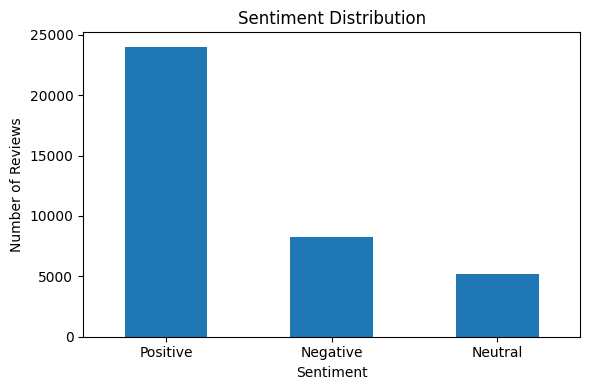

In [ ]:
# Sentiment Counts

sentiment_counts = reviews_clean['Sentiment'].value_counts()

print("Sentiment distribution:")
print(sentiment_counts)

# Bar chart
plt.figure(figsize=(6,4))
sentiment_counts.plot(kind='bar')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
# Polarity & Subjectivity Analysis

polarity_mean = reviews_clean['Sentiment_Polarity'].mean()
subjectivity_mean = reviews_clean['Sentiment_Subjectivity'].mean()

print("Average Polarity:", polarity_mean)
print("Average Subjectivity:", subjectivity_mean)

# Polarity by sentiment
polarity_by_sentiment = reviews_clean.groupby('Sentiment')['Sentiment_Polarity'].mean()
print("\nPolarity by Sentiment:")
print(polarity_by_sentiment)


Average Polarity: 0.18217064737425182
Average Subjectivity: 0.4927697503861726

Polarity by Sentiment:
Sentiment
Negative   -0.256173
Neutral     0.000000
Positive    0.372402
Name: Sentiment_Polarity, dtype: float64


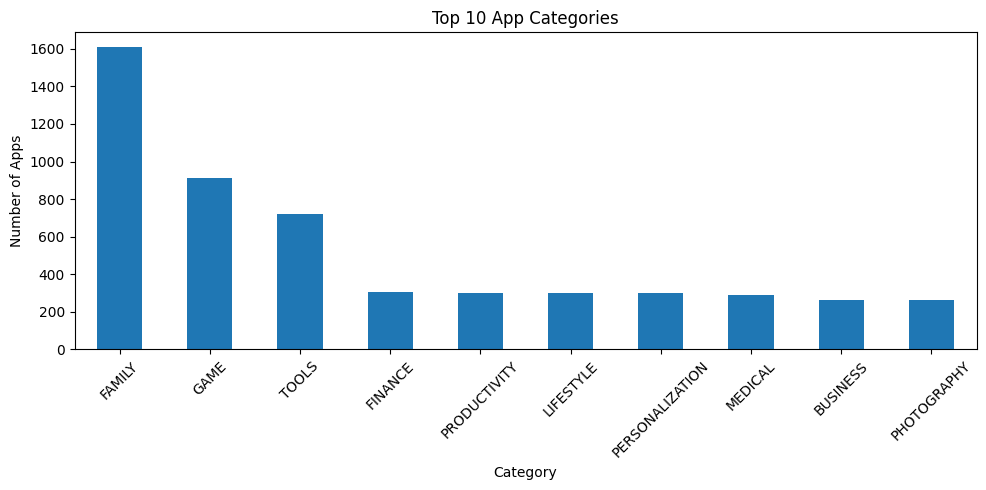

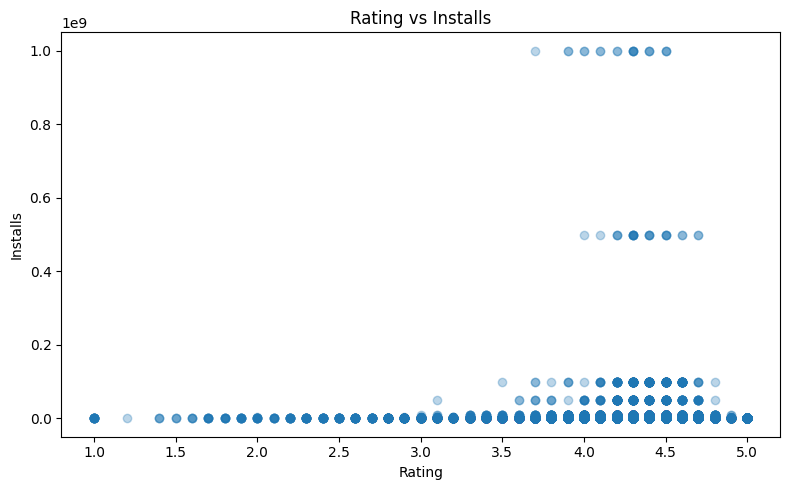

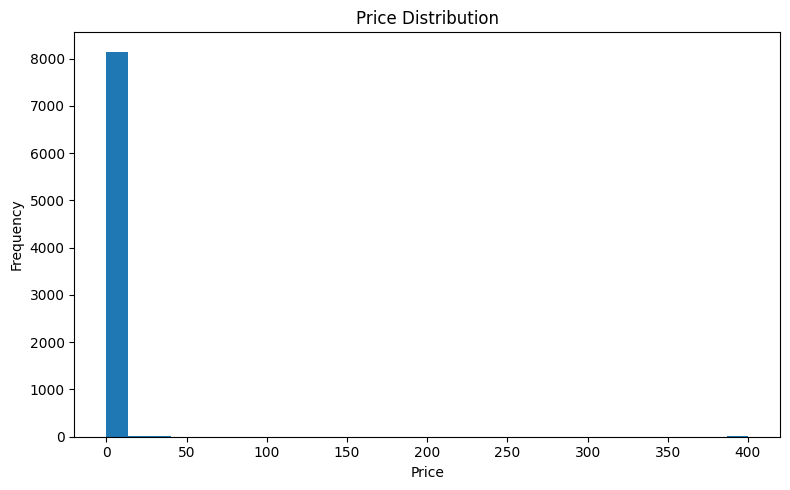

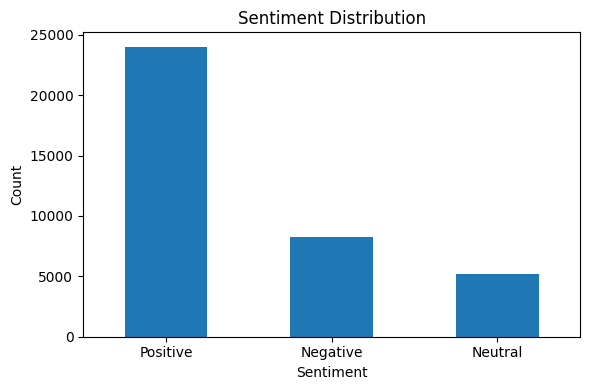

In [ ]:
# Interactive Visualizations (Simple & Clear)

# 1. Category Distribution (Top 10)
plt.figure(figsize=(10,5))
apps['Category'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 App Categories")
plt.xlabel("Category")
plt.ylabel("Number of Apps")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Installs vs Rating Scatter Plot
plt.figure(figsize=(8,5))
plt.scatter(apps['Rating'], apps['Installs'], alpha=0.3)
plt.title("Rating vs Installs")
plt.xlabel("Rating")
plt.ylabel("Installs")
plt.tight_layout()
plt.show()

# 3. Price Distribution
plt.figure(figsize=(8,5))
apps['Price'].plot(kind='hist', bins=30)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.tight_layout()
plt.show()

# 4. Sentiment Distribution (from your cleaned dataset)
plt.figure(figsize=(6,4))
reviews_clean['Sentiment'].value_counts().plot(kind='bar')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


1. Data Preparation Insights

Cleaning the dataset significantly improved the consistency of key fields such as Installs, Price, Size, Rating, and Dates.Converting these fields into proper numerical formats allowed accurate comparisons and further visual analysis.Handling missing values ensured no gaps influenced the results, especially in rating and size distribution.

2. Category Exploration Insights

The distribution of apps across categories revealed that some categories (like Games and Tools) are highly populated, indicating strong competition.Smaller categories may represent niche markets with potential growth opportunities.Understanding this spread helps identify which app types dominate the Play Store.

3. Metrics Analysis Insights

Apps with higher ratings were mostly found in Education, Productivity, and Lifestyle categories.Larger app sizes were typically seen in categories like Gaming and Entertainment.Free apps were more common, but paid apps showed noticeable patterns in pricing and installs.Install counts varied widely across categories, showing the true spread of popularity within the Play Store.

4. Sentiment Analysis Insights

User reviews showed clear trends of positive, neutral, and negative sentiment across apps.Negative reviews frequently focused on app crashes, intrusive ads, or performance issues.Positive sentiment was typically associated with smooth functionality and good user experience.This sentiment distribution highlights areas where developers can improve user satisfaction.

5. Visualization Insights

Interactive charts made it easier to explore: top-performing categories,rating trends,pricing patterns,user sentiment distributions.
Visual patterns showed strong relationships between app ratings, installs, and sentiment.

6. Overall Insight Summary

The cleaned and analyzed dataset provides a clear understanding of app performance across categories. Combining category trends, user sentiment, and metric patterns offers valuable insights into market dynamics and potential opportunities within the Android app ecosystem.